# Spring 2019 Statistical NLP, UCSD
Programming Assignment 2: Text Classification <br>


In [1]:
import nltk
import sentiment as sentimentinterface
import classify 
import timeit
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

## 1. Inspect the Feature representation

In [2]:
print("Reading data")
tarfname = "data/sentiment.tar.gz"
sentiment = sentimentinterface.read_files(tarfname)
    

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels


In [3]:
array = sentiment.trainX # the vocabulary dictionary and return term-document matrix
print(sentiment.train_data[0]) # the first entry in training data
X = sentiment.trainX # term-document matrix; 
# print(X.toarray().shape) #X : array, [n_samples, n_features]
print('~'*50)
print(sentiment.tfidf_vect.inverse_transform(X)[0]) # Return terms with nonzero entries in X[0].
X_arr = X.toarray()
print(X_arr[0], X[0])

Went last night for the first time with my boyfriend. Let me start off by saying I'm vegetarian, but my boyfriend is not. I ordered the chicken v mushroom, it
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['went' 'last' 'night' 'for' 'the' 'first' 'time' 'with' 'my' 'boyfriend'
 'let' 'me' 'start' 'off' 'by' 'saying' 'vegetarian' 'but' 'is' 'not'
 'ordered' 'chicken' 'mushroom' 'it']
[0. 0. 0. ... 0. 0. 0.]   (0, 9592)	0.15878840323061888
  (0, 4997)	0.18013187210760973
  (0, 5927)	0.18128971329445778
  (0, 3581)	0.09173674343456677
  (0, 8764)	0.11373143876251374
  (0, 3468)	0.16092582463668073
  (0, 8864)	0.1437049999370043
  (0, 9689)	0.11755398468216353
  (0, 5821)	0.1951450431575054
  (0, 1266)	0.5071710508679143
  (0, 5090)	0.21737213645730202
  (0, 5487)	0.14560545620461618
  (0, 8278)	0.2337143151848799
  (0, 6057)	0.19499770394693827
  (0, 1470)	0.1636395674056185
  (0, 7572)	0.24349838833929432
  (0, 9333)	0.2722838762717203
  (0, 1452)	0.11665854303032543
  (0, 4653)	0.

In [4]:
print((sentiment.tfidf_vect.get_feature_names()[6150])) # map id to word
print((sentiment.tfidf_vect.get_feature_names()[1791]))

ordered
chicken


# 2. Inspect the label representation

In [5]:
print('target labels ', sentiment.target_labels)
print('target labels ', sentiment.trainy[:5]) # show the labels of the first 5 training examples
print(list(sentiment.le.classes_))
print(list(sentiment.le.transform(['NEGATIVE', 'POSITIVE'])))
print(list(sentiment.le.inverse_transform(list(sentiment.trainy[:5]))))

target labels  ['NEGATIVE' 'POSITIVE']
target labels  [1 1 0 0 1]
['NEGATIVE', 'POSITIVE']
[0, 1]
['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE']


C:\Users\Ankit Batra\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 3. Take a look at the data

Went last night for the first time with my boyfriend. Let me start off by saying I'm vegetarian, but my boyfriend is not. I ordered the chicken v mushroom, it


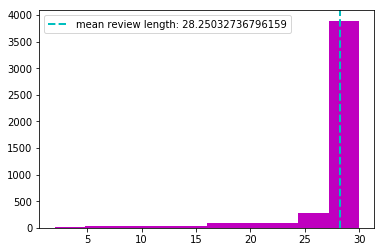

In [6]:
print(sentiment.train_data[0])

lens = []
for review in sentiment.train_data:
    lens.append(len(review.split()))
plt.hist(lens, color='m')
plt.axvline(np.mean(lens), color='c', linestyle='dashed', linewidth=2,label='mean review length: '+str(np.mean(lens)))
plt.legend()
plt.show()

# 4. Train the classifier

In [47]:
cls = classify.train_classifier(sentiment.trainX, sentiment.trainy)
# cls = LogisticRegression(C=10, penalty='l1', random_state=0, max_iter=10000)
# cls.fit(sentiment.trainX, sentiment.trainy)

# 5. What are the decisive features

In [48]:
coefficients=cls.coef_[0]
k = 8
top_k =np.argsort(coefficients)[-k:]
top_k_words = []

print('-'*50)
print('Top k=%d' %k)
print('-'*50)

for i in top_k:
    print(sentiment.tfidf_vect.get_feature_names()[i])
    top_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])
#print(sentiment.count_ve
print('-'*50)
print('Bottom k=%d' %k)
print('-'*50)
#top_k = np.argpartition(coefficients, -k)[-k:]
bottom_k =np.argsort(coefficients)[:k]
bottom_k_words = []
#print(top_k)
for i in bottom_k:
    print(sentiment.tfidf_vect.get_feature_names()[i])
    bottom_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])

#print(sentiment.count_ve

--------------------------------------------------
Top k=8
--------------------------------------------------
favorite
love
awesome
best
excellent
great
delicious
amazing
--------------------------------------------------
Bottom k=8
--------------------------------------------------
worst
horrible
terrible
rude
not
disappointing
disappointed
bad


# 6. How is the classifier doing edge cases

## 6 a) reviews that contain top-k words
 in this case we expect predictions to be mostly POSITIVE (i.e LABEL=1)


  Accuracy on these reviews  is: 0.808


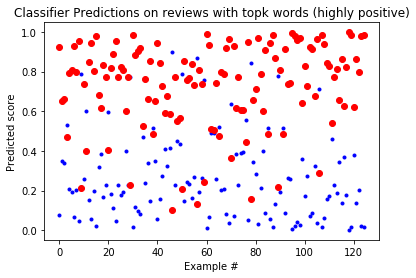

In [49]:
top_k_reviews = []
top_k_labels = []
for j in range(len(sentiment.dev_data)):
    review = sentiment.dev_data[j]
    for word in top_k_words:
        if word in review:
            top_k_reviews.append(review)
            top_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.tfidf_vect.transform(top_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(top_k_labels), cls, 'these reviews')


yp = cls.predict_proba(dev_X) 
#print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.title('Classifier Predictions on reviews with topk words (highly positive)')
plt.ylabel('Predicted score')
plt.xlabel('Example #')
plt.show()

## 6b) reviews that contain bottom-k words
 in this case we expect predictions to be mostly NEGATIVE (i.e LABEL=0)

  Accuracy on these reviews  is: 0.796875


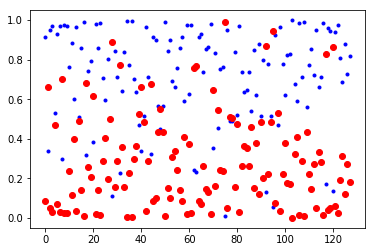

In [50]:
bottom_k_reviews = []
bottom_k_labels = []
for j in range(len(sentiment.dev_data)):
    review = sentiment.dev_data[j]
    for word in bottom_k_words:
        if word in review:
            bottom_k_reviews.append(review)
            bottom_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.tfidf_vect.transform(bottom_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(bottom_k_labels), cls, 'these reviews')
yp = cls.predict_proba(dev_X) 
#print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.show()

In [52]:
# Reading the unlabeled data
unlabeled_data = read_unlabeled(tarfname, sentiment)

sentiment/unlabeled.tsv
(91524, 9882)
